In [1]:
from pathlib import Path
import sys

parent_dir = Path().resolve().parent
sys.path.append(str(parent_dir))

import numpy as np
import pandas as pd
from models.ensemble import TME_ensemble
from models.tme import deses                  
from models.tme import rmse, mae, mape, iw, nnll   
from data.preprocess import read_txn_data , preprocess_txn_data, compute_lob_features, \
    create_lob_dataset, merge_txn_and_lob
from models.deseasonalization import deses


In [2]:
# normralization, regularization, why would the ensamble reduce the variance, the model showed extreme unstability due to the ... and ... 

In [3]:
cfg = {
    "data_split": {
        "train_size": 0.7,
        "validation_size": 0.1
    },
    "model_params": {
        "n_models": 10,
        "horizon": 100,
        "batch_size": 4096,
        "learning_rate": 0.001,
        "epochs": 10,
        "l2_lambda": 0.01  # L2 regularization strength
    }
}

# 1 min

trx Data loaded successfully.
preprocessed lob Data loaded successfully.

Training model 1/10
ep01  train 4.8608  val 4.6066
ep02  train 3.8583  val 3.0452
ep03  train 3.3796  val 2.8680
ep04  train 3.2286  val 2.8279
ep05  train 3.1376  val 2.7891
ep06  train 3.0677  val 2.7645
ep07  train 3.0091  val 2.7420
ep08  train 2.9609  val 2.7307
ep09  train 2.9179  val 2.7026
ep10  train 2.8785  val 2.6852

Training model 2/10
ep01  train 4.9563  val 5.1863
ep02  train 4.0124  val 3.1211
ep03  train 3.4216  val 2.8840
ep04  train 3.2450  val 2.8288
ep05  train 3.1487  val 2.7899
ep06  train 3.0758  val 2.7696
ep07  train 3.0155  val 2.7525
ep08  train 2.9683  val 2.7273
ep09  train 2.9215  val 2.7003
ep10  train 2.8824  val 2.6929

Training model 3/10
ep01  train 4.8562  val 4.5907
ep02  train 3.8660  val 3.0330
ep03  train 3.3758  val 2.8625
ep04  train 3.2240  val 2.8169
ep05  train 3.1365  val 2.7831
ep06  train 3.0659  val 2.7539
ep07  train 3.0084  val 2.7371
ep08  train 2.9595  val 2.7

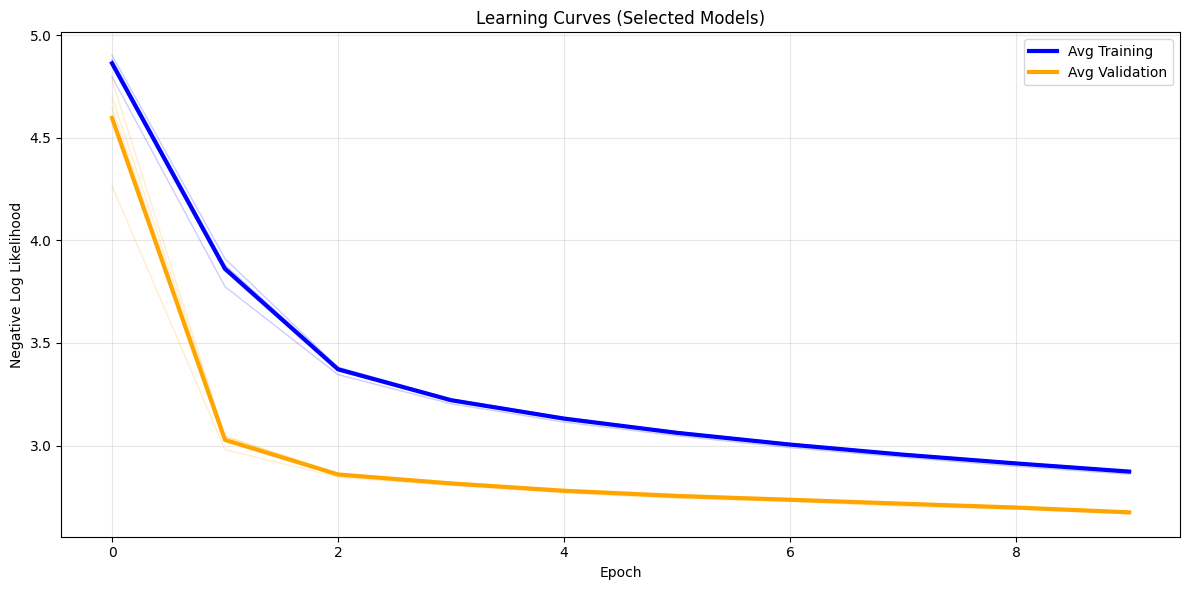

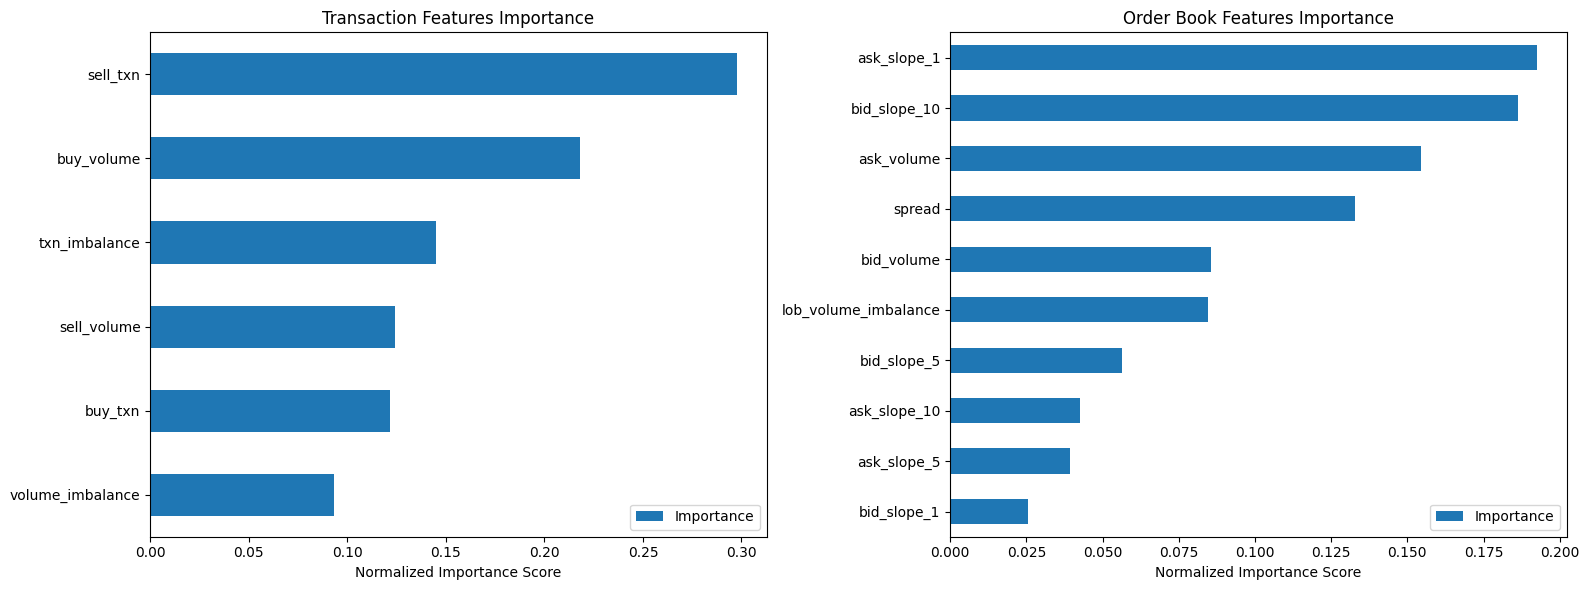

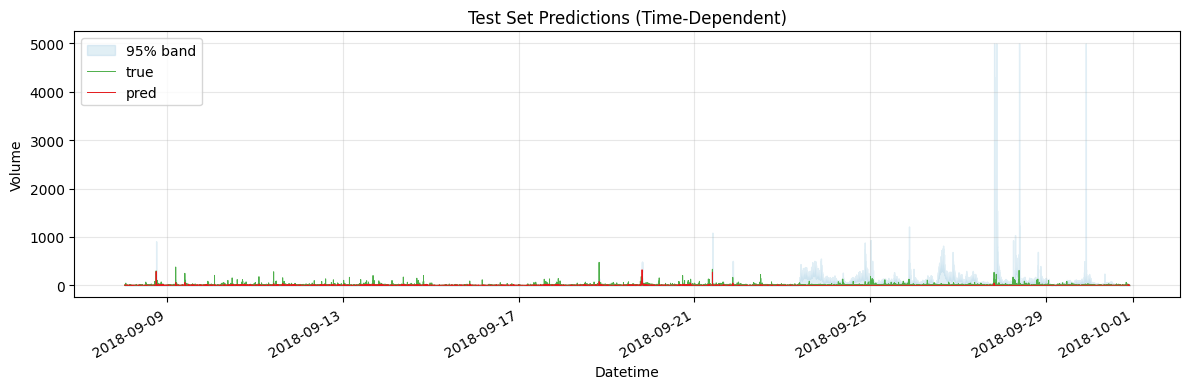

Metric     |      Value
-----------------------
RMSE         |      11.78
MAE           |       4.36
R²             |     0.0012
MAPE (%)  |     179.87
Coverage  |       79.3 %
IW             |      49.26
NNLL         |     4.9526


(array([1.61345043e-03, 5.79489520e-01, 1.00035343e-03, ...,
        1.52989072e+00, 9.35145751e-01, 9.83765599e-01]),
 array([6.47026387, 2.76559641, 2.53120188, ..., 3.40259203, 3.0335127 ,
        1.9825711 ]))

In [4]:


freq='1min'
trx_df = read_txn_data(use_load=False)
lob_df = create_lob_dataset(use_load=False)
trx_df = preprocess_txn_data(trx_df,freq, fill_missing_ts=False)
df_raw = merge_txn_and_lob(trx_df, lob_df)

tme = TME_ensemble(df_raw, cfg)
tme.train()

# New visualization methods
tme.plot_learning_curves() 
tme.plot_variable_importance()

# Evaluation
tme.evaluate()

# 5 min

trx Data loaded successfully.
preprocessed lob Data loaded successfully.

Training model 1/10
ep01  train 2.4147  val 3.0650
ep02  train 2.4067  val 2.9978
ep03  train 2.3555  val 2.8922
ep04  train 2.3015  val 2.7473
ep05  train 2.2399  val 2.5757
ep06  train 2.1783  val 2.4095
ep07  train 2.1040  val 2.2849
ep08  train 2.0569  val 2.2222
ep09  train 2.0246  val 2.2039
ep10  train 1.9998  val 2.2068

Training model 2/10
ep01  train 2.4134  val 3.0637
ep02  train 2.3814  val 2.9885
ep03  train 2.3373  val 2.8674
ep04  train 2.2800  val 2.7056
ep05  train 2.1976  val 2.5273
ep06  train 2.1308  val 2.3711
ep07  train 2.0692  val 2.2693
ep08  train 2.0221  val 2.2273
ep09  train 1.9976  val 2.2230
ep10  train 1.9750  val 2.2288

Training model 3/10
ep01  train 2.4171  val 3.0569
ep02  train 2.3932  val 2.9730
ep03  train 2.3516  val 2.8448
ep04  train 2.2786  val 2.6782
ep05  train 2.1987  val 2.5029
ep06  train 2.1198  val 2.3611
ep07  train 2.0651  val 2.2801
ep08  train 2.0344  val 2.2

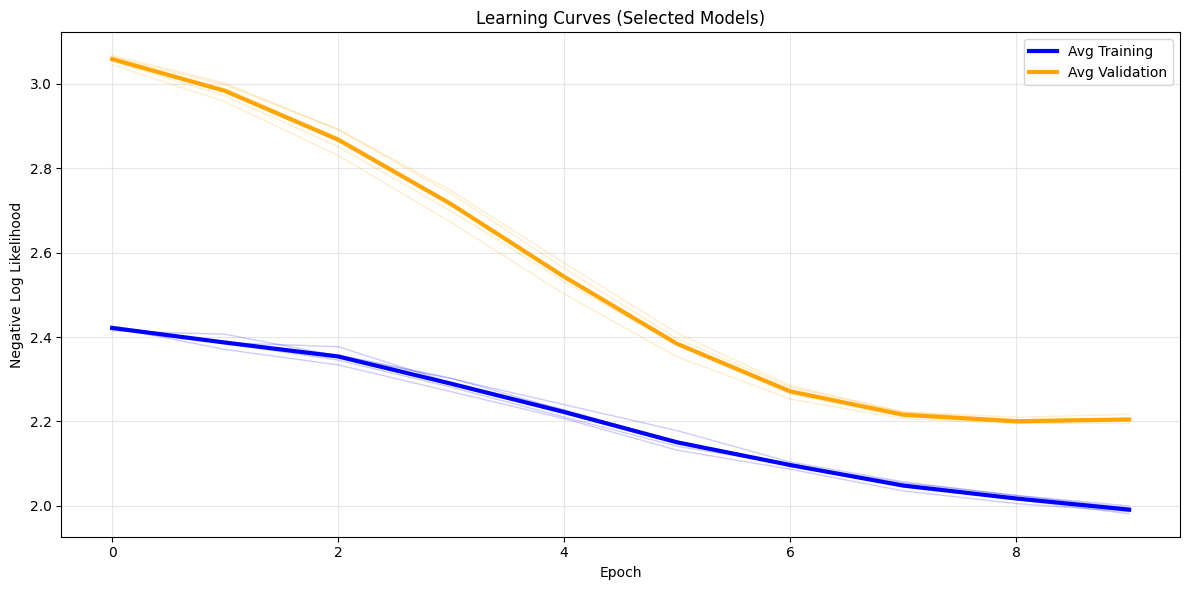

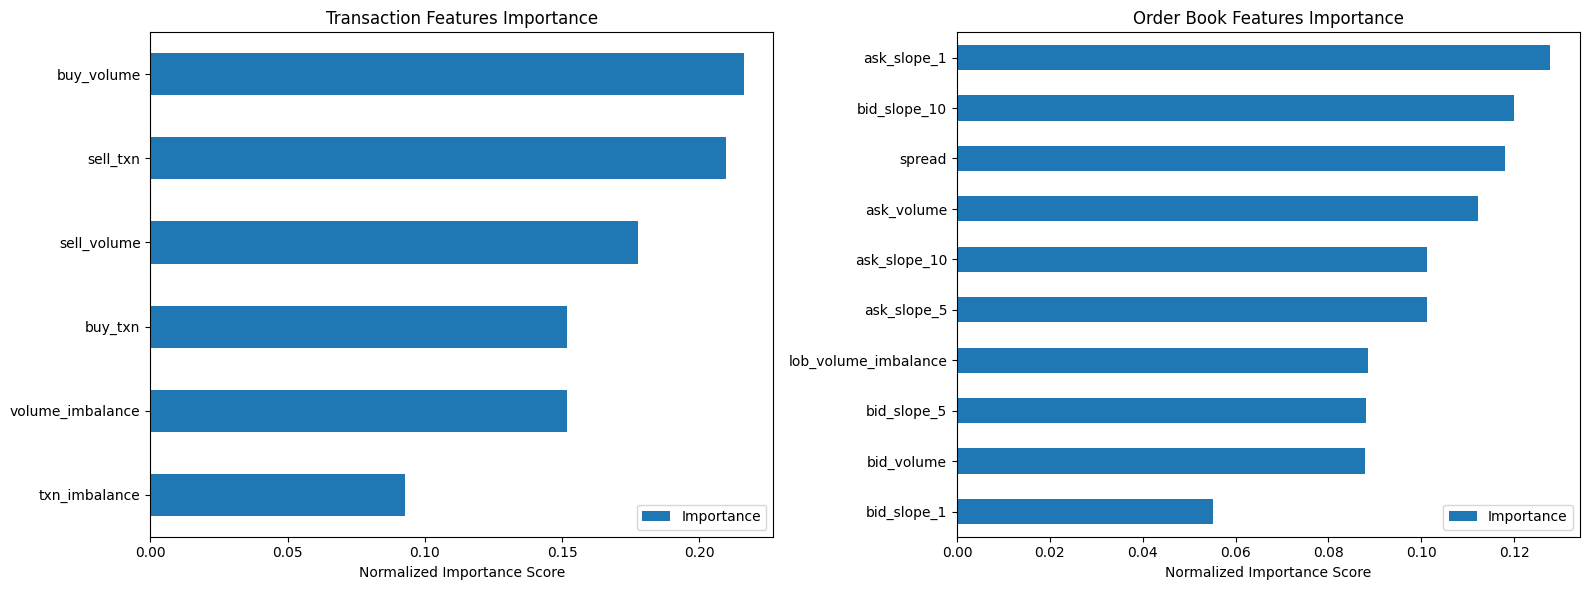

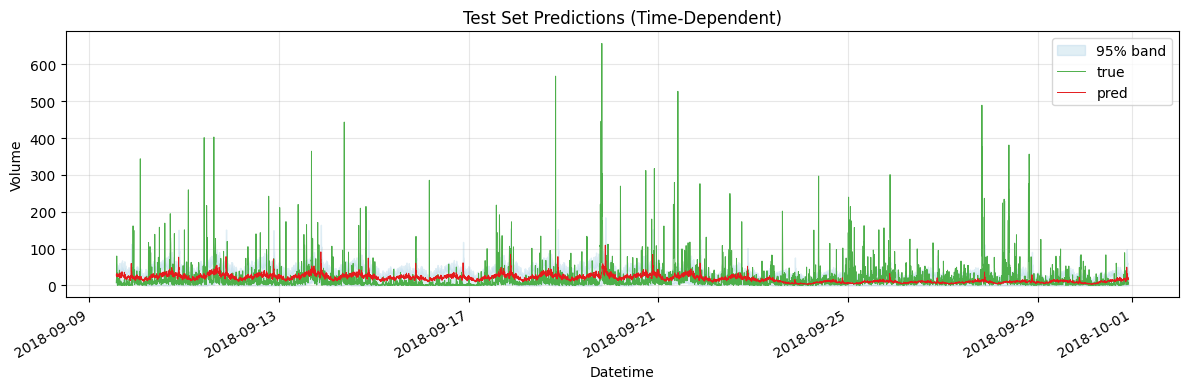

Metric     |      Value
-----------------------
RMSE         |      35.61
MAE           |      18.37
R²             |    -0.0169
MAPE (%)  |     423.72
Coverage  |       79.0 %
IW             |      39.76
NNLL         |     2.8107


(array([ 6.93566508, 15.83377776,  8.48661181, ...,  2.35188444,
         7.64728898,  4.93160051]),
 array([28.20178295, 28.1715379 , 24.21511539, ..., 19.46336597,
        16.19122866, 19.42950898]))

In [5]:


freq='5min'
trx_df = read_txn_data(use_load=False)
lob_df = create_lob_dataset(use_load=False)
trx_df = preprocess_txn_data(trx_df,freq, fill_missing_ts=False)
df_raw = merge_txn_and_lob(trx_df, lob_df)

tme = TME_ensemble(df_raw, cfg)
tme.train()

# New visualization methods
tme.plot_learning_curves() 
tme.plot_variable_importance()

# Evaluation
tme.evaluate()



# 10 min

trx Data loaded successfully.
preprocessed lob Data loaded successfully.

Training model 1/10
ep01  train 1.9218  val 2.2056
ep02  train 1.9084  val 2.1919
ep03  train 1.9045  val 2.1748
ep04  train 1.8915  val 2.1537
ep05  train 1.8745  val 2.1283
ep06  train 1.8633  val 2.0993
ep07  train 1.8492  val 2.0666
ep08  train 1.8292  val 2.0311
ep09  train 1.8217  val 1.9946
ep10  train 1.7973  val 1.9570

Training model 2/10
ep01  train 1.9147  val 2.2063
ep02  train 1.9102  val 2.1936
ep03  train 1.9064  val 2.1772
ep04  train 1.8991  val 2.1567
ep05  train 1.8823  val 2.1319
ep06  train 1.8702  val 2.1024
ep07  train 1.8518  val 2.0686
ep08  train 1.8298  val 2.0311
ep09  train 1.8108  val 1.9920
ep10  train 1.7989  val 1.9525

Training model 3/10
ep01  train 1.9221  val 2.2068
ep02  train 1.9093  val 2.1956
ep03  train 1.9037  val 2.1808
ep04  train 1.8949  val 2.1620
ep05  train 1.8811  val 2.1386
ep06  train 1.8653  val 2.1110
ep07  train 1.8589  val 2.0791
ep08  train 1.8351  val 2.0

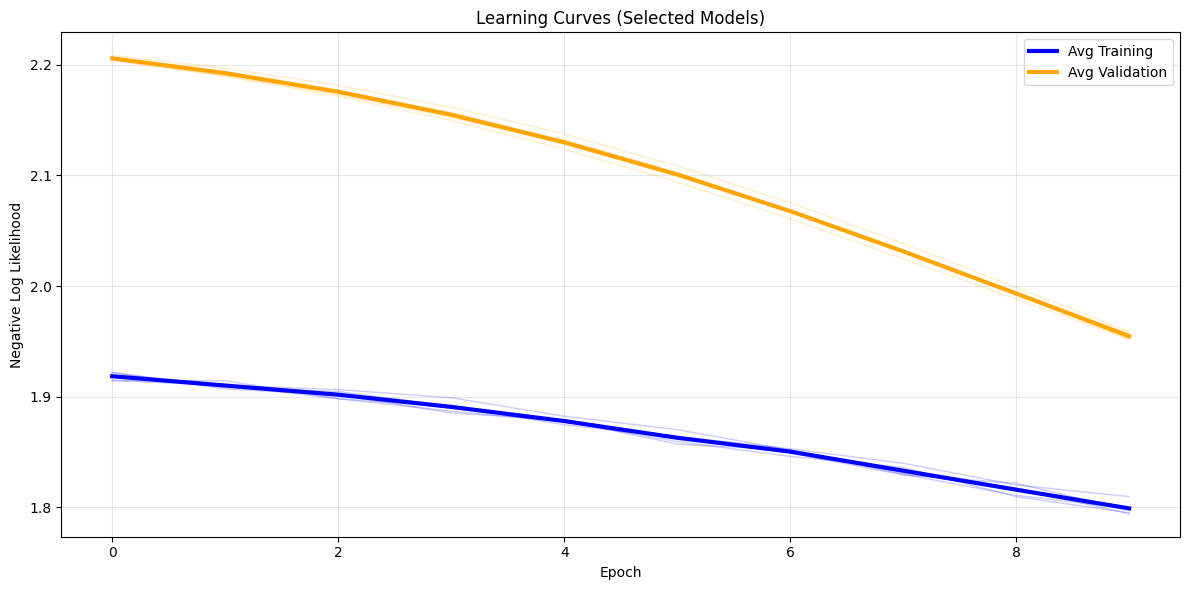

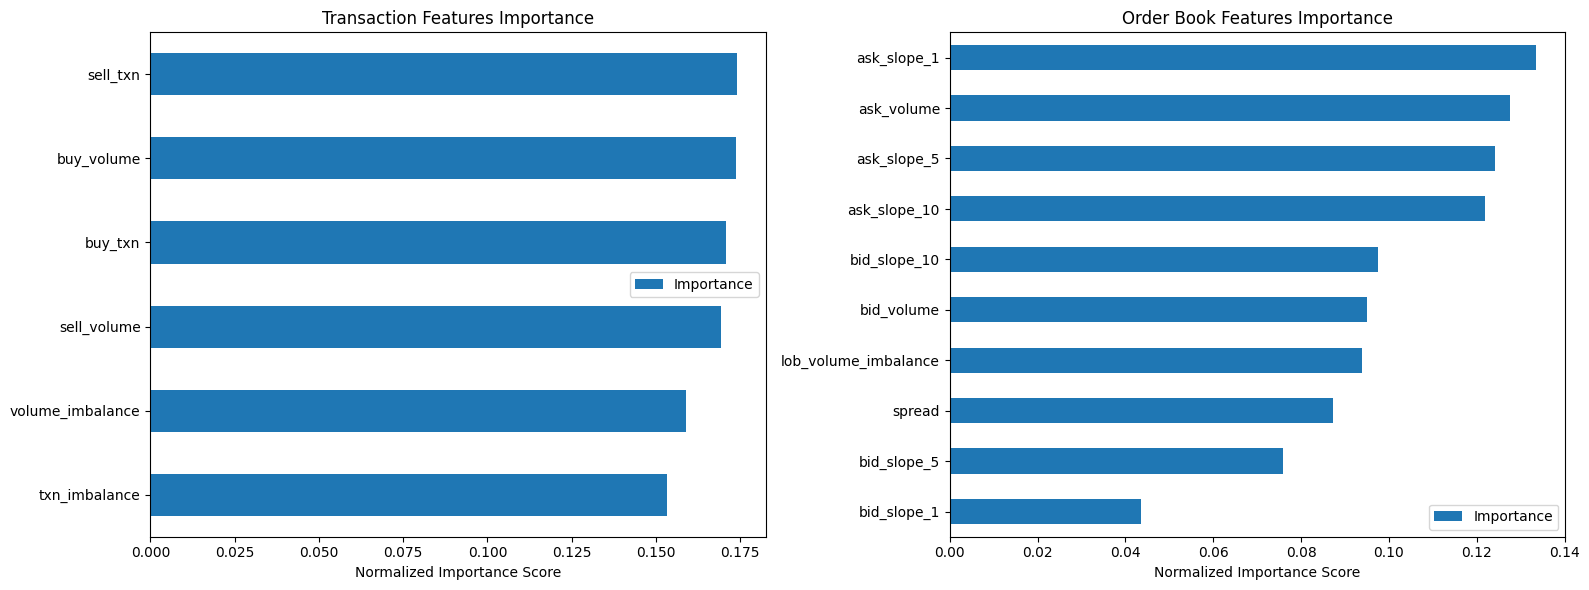

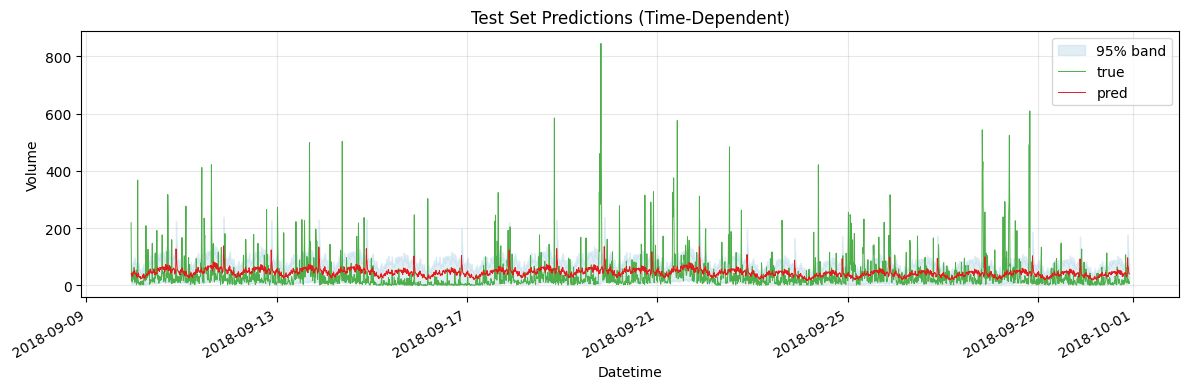

Metric     |      Value
-----------------------
RMSE         |      58.04
MAE           |      35.21
R²             |     0.0028
MAPE (%)  |     450.07
Coverage  |       68.9 %
IW             |      73.34
NNLL         |     2.3836


(array([219.10196249,  16.76405125,  48.48693492, ...,  19.63661188,
          6.01488119,  12.57888856]),
 array([40.37855116, 42.29755062, 32.81621986, ..., 49.12664159,
        40.15383143, 39.98627908]))

In [6]:


freq='10min'
trx_df = read_txn_data(use_load=False)
lob_df = create_lob_dataset(use_load=False)
trx_df = preprocess_txn_data(trx_df,freq, fill_missing_ts=False)
df_raw = merge_txn_and_lob(trx_df, lob_df)

tme = TME_ensemble(df_raw, cfg)
tme.train()

# New visualization methods
tme.plot_learning_curves() 
tme.plot_variable_importance()

# Evaluation
tme.evaluate()
